<P ALIGN=center><img src="https://www.ucentral.edu.co/sites/default/files/inline-images/logosimbolo-ucentral-vigilada_4.png" width="250" align="up">

<H1 ALIGN=center><b>Maestría en Analítica de Datos<br>
<H1>Regresion Lineal<br>
<H4>Taller Precio de Casas<br>

<H4>Angel Enrique Torres Benitez

---

## Los Datos:

Los datos que se usaran para el presente estudio, se encuentran publicados como:

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) 

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

## Importo las librerias

In [731]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test 
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas 
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica

## Importo los datos:

In [732]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [733]:
train = pd.read_csv("/content/drive/MyDrive/Estadistica/Bases/Tarea_Casas/train.csv")
test = pd.read_csv('/content/drive/MyDrive/Estadistica/Bases/Tarea_Casas/test.csv')

In [734]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [735]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Tipos de datos

In [736]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Un **Describe** de los valores del dataset

In [737]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Columnas

In [738]:
#Muestra las columnas de la base
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Conteo de los tipos de datos

In [739]:
#Cuenta los tipos de datos
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [740]:
#Cuenta los tipos de datos
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

## Conteo de filas y Columnas

In [741]:
# Número total de filas y columnas
train.shape

(1460, 81)

In [742]:
# Número total de filas y columnas
test.shape

(1459, 80)

## Verificacion de los Nulos

Se hace una revision de cuantos nulos hay en las dos bases train y test

In [743]:
#Dataframe que suma los valores Nulos
null_value = pd.DataFrame()
null_value['variable'] = test.columns
null_value['Train'] = train.drop(labels='SalePrice',axis=1).isnull().sum().to_list()
null_value['Test']=test.isnull().sum().to_list()
null_value

,variable,Train,Test
0,Id,0,0
1,MSSubClass,0,0
2,MSZoning,0,4
3,LotFrontage,259,227
4,LotArea,0,0
...,...,...,...
75,MiscVal,0,0
76,MoSold,0,0
77,YrSold,0,0
78,SaleType,0,1


# Comportamientos de la variable Objetivo



### Precios de las casas

In [744]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* El precio promedio de una casa esta en US180.921
* El valor minimo de una casa es de US34.900
* El valor maximo de una casa es de US755.000

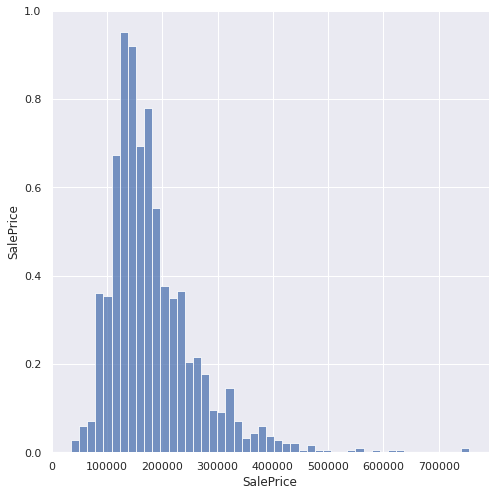

In [745]:
#Comportamiento de los precios de las casas
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='notebook')
cols = ['SalePrice']
sns.pairplot(train[cols], height=7, kind="hist")
plt.show()

#sns.pairplot(train[cols], height=7)

Los precios de las casas tiene un grupo que va desde los US80.000 hasta los US 230.000 dolares.

Hay una casa que vale 755.000

In [746]:
fig=px.histogram(x=train.SalePrice, title='Precios de las casas')
fig.show()

In [747]:
fig=px.histogram(x=np.log(train.SalePrice+1)) ## Porque el logaritmo de cero 
fig.show()

## Eliminacion de los Nulos

Se guarda en una nueva base llamada base_interes todas las columnas de la base y con dropna se eliminan todas las columnas que tiene NA

La nueva base se va a llamar **train1**

In [748]:
base_interes=train[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']] ## Selecciono a Y y a las X
train1=base_interes.dropna(axis=1) ### Eliminar los  NA'S 
train1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [749]:
# Número total de filas y columnas
train1.shape

(1460, 62)

Quedaron las mismas filas 1460 pero con 62 columnas, inicialmente habia 81 columnas

## Poniendo los Dummies

In [750]:
# A la base train1 le quitamos la variable objetivo que es el precio de venta 
# La matriz de las variables explicativas 
X=train1.drop(["SalePrice"], axis=1) 
# La variable dependiente Y va a ser el precio de venta 
Y=train1["SalePrice"] ### Selecciono la variable objetivo
X.shape

(1460, 61)

Asignacion de los Dummies

In [751]:
X = pd.get_dummies(X, drop_first=True)
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,0,1,0,0,0,1,0


Quedaron 189 Columnas con la asignacion de los dummies

In [752]:
X.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [753]:
#Cuenta los tipos de datos
#Se observa que no quedaron datos de tipo cualitativos
X.dtypes.value_counts()

uint8    155
int64     34
dtype: int64

## Creando Modelos
Primero se usará un modelo con todas las variables.

In [754]:
### X_train y Y_train tendrán los mismos individuos (un 80%)
### X_test y Y_test tendrán el 20% restante
### Esta división se hace aleatoria
### El random_state es para garantizar que a otra persona le de los mismo
### en la selección aleatoria
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=20) ## Muestreo aleatorio simple
X_test.shape

(292, 189)

In [755]:
X_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1137,1138,50,6342,5,8,1875,1996,0,0,780,...,0,0,0,0,1,0,0,0,1,0
1335,1336,20,9650,6,5,1977,1977,686,0,664,...,0,0,0,0,1,0,0,0,1,0
459,460,50,7015,5,4,1950,1950,185,0,524,...,0,0,0,0,1,0,0,0,1,0
115,116,160,3230,6,5,1999,1999,419,0,310,...,0,0,0,0,1,0,0,0,1,0
908,909,20,8885,5,5,1983,1983,301,324,239,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,20,10240,6,6,1980,1980,625,1061,0,...,0,0,0,0,1,0,0,0,1,0
1247,1248,80,12328,6,5,1976,1976,539,0,473,...,0,0,0,0,1,0,0,0,1,0
271,272,20,39104,7,7,1954,2005,226,1063,96,...,0,0,0,0,1,0,0,0,1,0
474,475,120,5330,8,5,2000,2000,1196,0,298,...,0,0,0,0,1,0,0,0,1,0


In [756]:
X_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
954,955,90,9400,6,5,1975,1975,945,0,0,...,0,0,0,0,1,1,0,0,0,0
326,327,120,10846,8,5,1993,1993,1619,0,100,...,0,0,0,0,0,0,0,0,1,0
308,309,30,12342,4,5,1940,1950,262,0,599,...,0,0,0,0,1,0,0,0,1,0
1058,1059,60,11308,9,5,2008,2008,936,0,168,...,0,0,0,0,1,0,0,0,1,0
416,417,60,7844,6,7,1978,1978,209,0,463,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,60,7399,7,5,1997,1998,649,0,326,...,0,0,0,0,1,0,0,0,1,0
1340,1341,20,8294,4,5,1971,1971,0,0,858,...,0,0,0,0,1,0,0,0,1,0
316,317,60,13005,7,7,1980,1980,692,0,153,...,0,0,0,0,1,0,0,0,1,0
318,319,60,9900,7,5,1993,1993,987,0,360,...,0,0,0,0,1,0,0,0,1,0


In [757]:
Y_train

1137     94000
1335    167900
459     110000
115     176000
908     131000
         ...  
924     207500
1247    169900
271     241500
474     251000
1379    167500
Name: SalePrice, Length: 1168, dtype: int64

In [758]:
Y_test

954     127500
326     324000
308      82500
1058    335000
416     149500
         ...  
297     239000
1340    123000
316     260000
318     260000
689     194700
Name: SalePrice, Length: 292, dtype: int64

In [759]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              526.4
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                        0.00
Time:                        03:06:13   Log-Likelihood:                         -16696.
No. Observations:                1460   AIC:                                  3.376e+04
Df Residuals:                    1274   BIC:                                  3.475e+04
Df Model:                         186                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

## Entrenar el modelo

In [760]:
#### Sólo lo hago con los datos de entrenamiento
#### las 189 variables y las 1168 filas
RegresionLineal=linear_model.LinearRegression().fit(X_train, Y_train) ## Entrenar la regresión

In [761]:
### Los parametros estimados
print("Intercepto", RegresionLineal.intercept_)
print("betas", pd.DataFrame(RegresionLineal.coef_, index=X_train.columns))

Intercepto -1198045.5982506773
betas                                   0
Id                         0.477298
MSSubClass               -16.553693
LotArea                    0.645277
OverallQual             8093.910659
OverallCond             5029.008357
...                             ...
SaleCondition_AdjLand  19514.727441
SaleCondition_Alloca   11855.083253
SaleCondition_Family    4519.956097
SaleCondition_Normal    8263.445255
SaleCondition_Partial  -4317.903282

[189 rows x 1 columns]


In [762]:
## Para obtener un valor pronosticado,
## Simplemente le ingreso los valores de X
RegresionLineal.predict(X_test)[0:189]

array([ 162894.58373007,  273579.18079819,  105988.36548334,
        370377.21534679,  155774.6522765 ,  270469.98078343,
        225728.03652643,  210126.37773822,  150517.84410095,
        245300.21830974,  258130.46254765,  118955.1232424 ,
        231454.83213069,  165540.69795102,  102224.30343268,
        128193.54444261,  131850.96308634,   60518.00987493,
        176777.28677641,  203795.7424547 ,  154147.98580347,
        182938.93134219,  343465.13781553,  122783.09283312,
        179816.62441048,  191392.34873679,  135451.09402208,
        129850.47843487,   94415.90888046,   93268.79741517,
        121039.32495344,  296753.32198243,  225753.89715215,
        102747.36128671,   52274.07831665,  143565.22355135,
        132925.68283825,  222439.86966913,  136587.56702592,
        235718.14974139,  147229.90065356,   87571.93991926,
        254069.6298382 ,  112896.6550416 ,  197046.62058869,
        150325.77974125,  159059.49071404,  452972.2561581 ,
        232916.94050374,

In [763]:
pd.DataFrame(RegresionLineal.predict(X_test)[0:189], index=Y_test[0:189].index) ### Valores pronosticados

,0
954,162894.583730
326,273579.180798
308,105988.365483
1058,370377.215347
416,155774.652276
...,...
948,208794.106063
1199,137848.724932
438,118043.101517
803,425993.222132


In [764]:
Y_test[0:189]

954     127500
326     324000
308      82500
1058    335000
416     149500
         ...  
948     192500
1199    148000
438      90350
803     582933
1271    185750
Name: SalePrice, Length: 189, dtype: int64

## ¿Y este modelo es bueno?
Observar su comportamiento en pronostico.

In [765]:
Y_test

954     127500
326     324000
308      82500
1058    335000
416     149500
         ...  
297     239000
1340    123000
316     260000
318     260000
689     194700
Name: SalePrice, Length: 292, dtype: int64

In [766]:
pd.DataFrame(RegresionLineal.predict(X_test)[0:292], index=Y_test[0:292].index) ### Valores pronosticados

,0
954,162894.583730
326,273579.180798
308,105988.365483
1058,370377.215347
416,155774.652276
...,...
297,245023.425521
1340,103597.415038
316,271532.658413
318,323825.415108


In [767]:
### Entrenamiento
from sklearn.metrics import r2_score
Y_pred_train=RegresionLineal.predict(X_train) ### Pronostico
r2_score(Y_train, Y_pred_train) ### Los datos de entrenamiento

0.921779089681493

In [768]:
## Pueba
Y_pred_test=RegresionLineal.predict(X_test) ### Pronostico
r2_score(Y_test, Y_pred_test) ### Los datos de prueba

0.6994680839732313

In [769]:
### Entrenamiento
from sklearn.metrics import mean_squared_error
Y_pred_train=RegresionLineal.predict(X_train) ### Pronostico
mean_squared_error(Y_train, Y_pred_train) ### Los datos de entrenamiento

482499550.3197218

In [770]:
### Prueba
Y_pred_test=RegresionLineal.predict(X_test) ### Pronostico
mean_squared_error(Y_test, Y_pred_test) ### Los datos de prueba

2060432550.3848205

In [771]:
from sklearn.metrics import r2_score
Y_pred_train=RegresionLineal.predict(X_train) ### Entrenamiento
Y_pred_test=RegresionLineal.predict(X_test) ## Prueba
print("R2 train",np.round(r2_score(Y_train, Y_pred_train),2)*100, "%")
print("R2 prueba",np.round(r2_score(Y_test, Y_pred_test),2)*100, "%")

R2 train 92.0 %
R2 prueba 70.0 %


In [772]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred_train=reg.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),2), "%")
pred_test=reg.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),2), "%")

El R2 de entrenamiento es  92.0 %
El R2 de prueba es  52.0 %


In [773]:
seleccion=RFE(reg,  n_features_to_select=189, step=1) ## Seleccionar un modelo más pequeño
seleccion = seleccion.fit(X_train, y_train)  ## Parsimonioso
X.columns[seleccion.support_]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [774]:
pred_train=seleccion.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=seleccion.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")
fig=px.scatter(X, x=y_train, y=X_train.YearBuilt)
fig.show()

El R2 de entrenamiento es  92.08 %
El R2 de prueba es  51.67 %


In [775]:
pd.DataFrame(seleccion.ranking_, index=X.columns).sort_values(by=0).iloc[1:189] ## Ordenar las variables por importancia

,0
Exterior1st_ImStucc,1
Exterior1st_MetalSd,1
Exterior1st_Plywood,1
Exterior1st_Stone,1
Exterior1st_Stucco,1
...,...
Neighborhood_NWAmes,1
Neighborhood_NoRidge,1
Neighborhood_NridgHt,1
Neighborhood_Edwards,1


## Exporto la regresion lineal

In [776]:
# filename = 'RL_modelo3.sav'
# pickle.dump(reg, open(filename, 'wb'))

In [777]:
#X_test.to_excel("Datos_nuevos.xlsx")